# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Anindya Lokeswara
- **Email:** m010d4ky3253@bangkit.academy
- **ID Dicoding:** anindyalkwr

## Menentukan Pertanyaan Bisnis

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

- How does daily bike vary change over time, and which season or month experiences the highest usage? Is there a correlation between bike usage and the number of holidays in that season or month?
- What are the mean values of temperature (temp), feels-like temperature (atemp), humidity (hum), and wind speed? How do these factors correlate with the number of daily bike rentals?

## Import Semua Packages/Library yang Digunakan

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Gathering Data

In [335]:
day = pd.read_csv('day.csv')

day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [336]:
hour = pd.read_csv('hour.csv')

hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


The hour dataframe provides detailed information for each hour, in contrast to the day dataframe, which offers daily information. Therefore, I believe merging these two dataframes is unnecessary.

### Assessing Data

In [337]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [338]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


It appears that all the columns are numeric except for 'dteday'. We will convert this column to the DateTime type to facilitate time series visualization later in the cleaning process. Now, let's check if the data has any missing values.

In [339]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [340]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

After confirming that there are no missing values in the data, we should now investigate whether the dataset contains any duplicated entries.



In [341]:
day.duplicated().sum()

0

In [342]:
hour.duplicated().sum()

0

There are also no duplicated values in the data. Now, we will check for any inconsistencies within the data. I will first verify in the day dataframe whether the 'cnt' column equals the sum of the 'registered' and 'casual' columns.

In [343]:
is_equal = (day['casual'] + day['registered'] == day['cnt']).all()

print("Is the sum of 'casual' and 'registered' equal to 'cnt' for all rows?:", is_equal)

Is the sum of 'casual' and 'registered' equal to 'cnt' for all rows?: True


There are also 731 entries in the day dataframe, which corresponds to the total number of days in the years 2011 and 2012 combined.

Next, I will examine the hour dataframe by grouping it by day to see if the results match those of the day dataframe.

In [344]:
grouped = hour.groupby('dteday').agg({
    'season': 'first',
    'yr': 'first',
    'mnth': 'first',
    'holiday': 'first',
    'weekday': 'first',
    'workingday': 'first',
    'weathersit': 'first',
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})

grouped = grouped.reset_index()
grouped['instant'] = range(1, len(grouped) + 1)

grouped

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,instant
0,2011-01-01,1,0,1,0,6,0,1,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,3,0.254167,0.226642,0.652917,0.350133,247,1867,2114,727
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,728
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,729
729,2012-12-30,1,1,12,0,0,0,2,0.255833,0.231700,0.483333,0.350754,364,1432,1796,730


Upon reviewing the data, I believe we can conclude that it is consistent. There might be slight inconsistencies caused by rounding issues for variables such as temperature, but these are not immediately apparent.

The last step in our data wrangling process will be to check for any outliers in our data. We will use the function defined in the Dicoding course to perform this check.

In [345]:
def check_outliers(data):
  data = data.dropna()
  q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
  iqr = q75 - q25
  cut_off = iqr * 1.5
  minimum, maximum = q25 - cut_off, q75 + cut_off

  outliers = [x for x in data if x < minimum or x > maximum]
  return len(outliers)

In [346]:
for column in day.drop(columns = ['dteday']).columns:
    outliers_count = check_outliers(day[column])
    print(f"The column {column} has {outliers_count} outlier values.")

The column instant has 0 outlier values.
The column season has 0 outlier values.
The column yr has 0 outlier values.
The column mnth has 0 outlier values.
The column holiday has 21 outlier values.
The column weekday has 0 outlier values.
The column workingday has 0 outlier values.
The column weathersit has 0 outlier values.
The column temp has 0 outlier values.
The column atemp has 0 outlier values.
The column hum has 2 outlier values.
The column windspeed has 13 outlier values.
The column casual has 44 outlier values.
The column registered has 0 outlier values.
The column cnt has 0 outlier values.


In [347]:
for column in hour.drop(columns = ['dteday']).columns:
    outliers_count = check_outliers(hour[column])
    print(f"The column {column} has {outliers_count} outlier values.")

The column instant has 0 outlier values.
The column season has 0 outlier values.
The column yr has 0 outlier values.
The column mnth has 0 outlier values.
The column hr has 0 outlier values.
The column holiday has 500 outlier values.
The column weekday has 0 outlier values.
The column workingday has 0 outlier values.
The column weathersit has 3 outlier values.
The column temp has 0 outlier values.
The column atemp has 0 outlier values.
The column hum has 22 outlier values.
The column windspeed has 342 outlier values.
The column casual has 1192 outlier values.
The column registered has 680 outlier values.
The column cnt has 505 outlier values.


### Cleaning Data

For the data cleaning process, we will begin by converting the 'dteday' column to the DateTime type.

In [348]:
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

Since there are no missing or duplicated values, we will focus on handling outliers using the imputation method to avoid losing significant information. We will also utilize the function defined in the Dicoding course for this purpose.

In [349]:
def impute_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    condition_lower_than = column < minimum
    condition_more_than = column > maximum

    column = column.apply(lambda x: maximum if x > maximum else (minimum if x < minimum else x))
    return column

Let's first list the columns that contain outliers before applying the function. We will exclude 'holiday' from imputation since the value 1 will consistently be identified as an outlier, given the infrequent occurrence of holidays

In [350]:
day_outliers = ['hum', 'windspeed', 'casual']
hour_outliers = ['weathersit', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [351]:
for column_name in day_outliers:
    day[column_name] = impute_outliers(day[column_name])

for column_name in hour_outliers:
    hour[column_name] = impute_outliers(hour[column_name])

By imputing outliers with maximum and minimum values, we may not eliminate all outliers but can significantly reduce their number. Let's check again.

In [352]:
for column in day.drop(columns = ['dteday']).columns:
    outliers_count = check_outliers(day[column])
    print(f"The column {column} has {outliers_count} outlier values.")

The column instant has 0 outlier values.
The column season has 0 outlier values.
The column yr has 0 outlier values.
The column mnth has 0 outlier values.
The column holiday has 21 outlier values.
The column weekday has 0 outlier values.
The column workingday has 0 outlier values.
The column weathersit has 0 outlier values.
The column temp has 0 outlier values.
The column atemp has 0 outlier values.
The column hum has 0 outlier values.
The column windspeed has 0 outlier values.
The column casual has 0 outlier values.
The column registered has 0 outlier values.
The column cnt has 0 outlier values.


In [353]:
for column in hour.drop(columns = ['dteday']).columns:
    outliers_count = check_outliers(hour[column])
    print(f"The column {column} has {outliers_count} outlier values.")

The column instant has 0 outlier values.
The column season has 0 outlier values.
The column yr has 0 outlier values.
The column mnth has 0 outlier values.
The column hr has 0 outlier values.
The column holiday has 500 outlier values.
The column weekday has 0 outlier values.
The column workingday has 0 outlier values.
The column weathersit has 0 outlier values.
The column temp has 0 outlier values.
The column atemp has 0 outlier values.
The column hum has 0 outlier values.
The column windspeed has 0 outlier values.
The column casual has 0 outlier values.
The column registered has 0 outlier values.
The column cnt has 0 outlier values.


Great, now the dataframe is clean, and we can proceed with the Exploratory Data Analysis (EDA) process.

## Exploratory Data Analysis (EDA)

### Explore Data Summary Statistics

We will explore an overview of the data's summary statistics using the `describe()` method.

In [354]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628197,0.189846,824.388509,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.141320,0.075644,623.642956,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.204687,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.380611,2266.750000,6946.000000,8714.000000


In [355]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425197,0.496987,0.475775,0.627267,0.188691,31.158812,148.645204,186.361327
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639043,0.192556,0.171850,0.192809,0.118197,34.813147,135.351791,171.931168
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,3.500000,1.000000,1.000000,1.000000,0.477500,114.000000,499.000000,642.500000


### Explore Numeric Column Distribution (Continuous)

For continuous data, we will examine the distribution using histogram visualizations in seaborn. For this reason, we will exclude other numeric columns that are discrete.

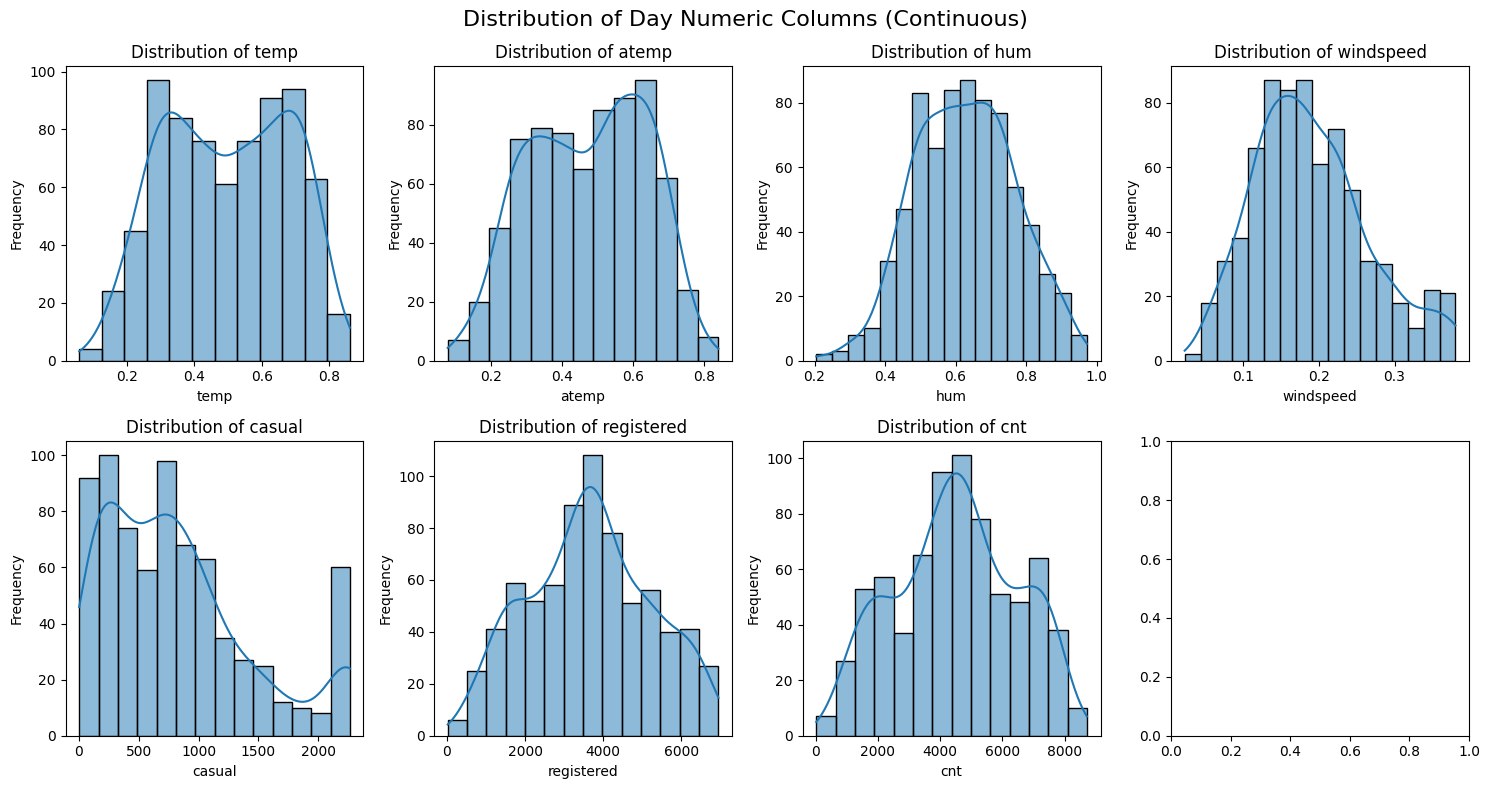

In [356]:
numeric_columns = day.drop(columns = ['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']).select_dtypes(include=['number']).columns
n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
fig.suptitle('Distribution of Day Numeric Columns (Continuous)', fontsize=16)

for i, column in enumerate(numeric_columns):
    row, col = divmod(i, n_cols)
    sns.histplot(day[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

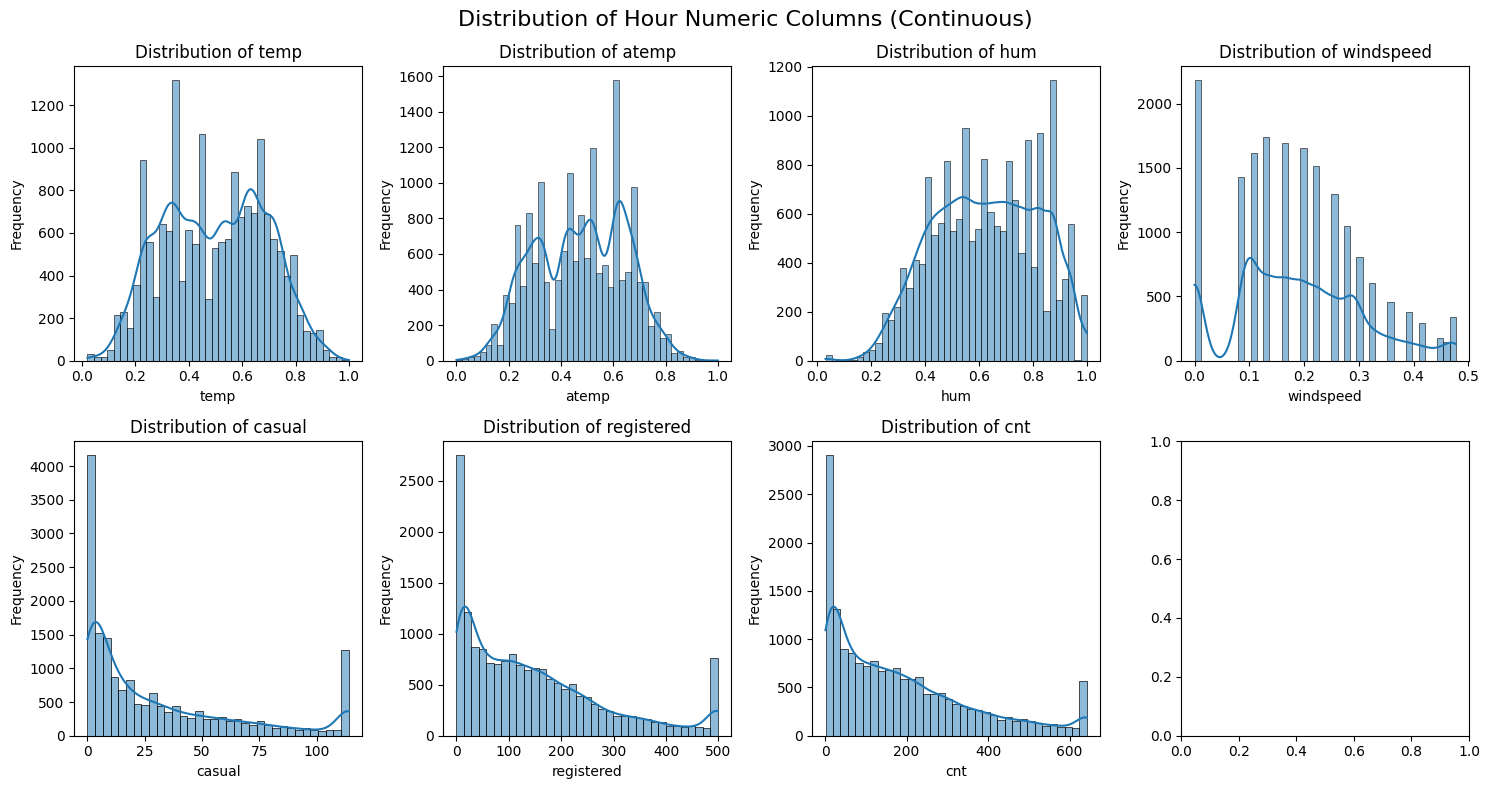

In [357]:
numeric_columns = hour.drop(columns = ['instant', 'season', 'yr', 'mnth', 'hr','holiday', 'weekday', 'workingday', 'weathersit']).select_dtypes(include=['number']).columns
n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
fig.suptitle('Distribution of Hour Numeric Columns (Continuous)', fontsize=16)

for i, column in enumerate(numeric_columns):
    row, col = divmod(i, n_cols)
    sns.histplot(hour[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The data exhibits normal distributions and some skewness. An interesting pattern emerges in the hourly visualizations, where spikes for casual, registered, and cnt at maximum values are observed. This may be influenced by the imputation of outlier values previously conducted.

### Explore Numeric Column Distribution (Discrete)

For the discrete numeric columns, we will focus on examining the distribution of `holiday`, `workingday`, and `weathersit` solely from the 'day' dataframe. The rationale for not analyzing variables such as `season`, `year`, `month`, and `weekday` is that, given the daily nature of the data, the results would remain consistent.
Additionally, there is no need to assess the 'hour' dataframe, as it would merely increase the count of observations without altering the distribution of variables like `holiday`, `workingday`, and `weathersit`, which remain constant throughout the hours.

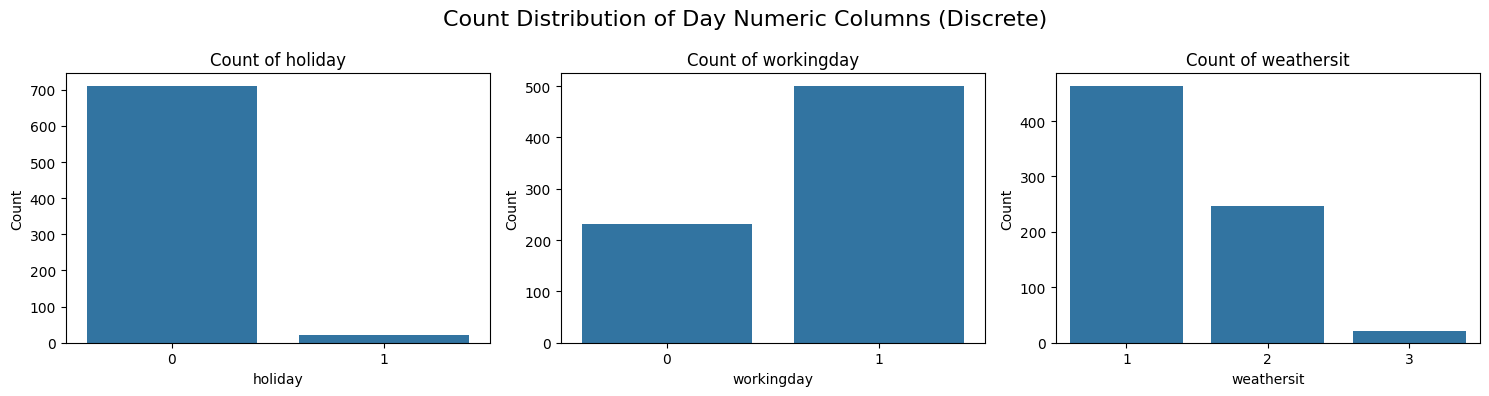

In [358]:
numeric_columns = ['holiday', 'workingday', 'weathersit']

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
fig.suptitle('Count Distribution of Day Numeric Columns (Discrete)', fontsize=16)

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.countplot(x=column, data=day, ax=axes[i])
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Explore Numeric Column Correlation

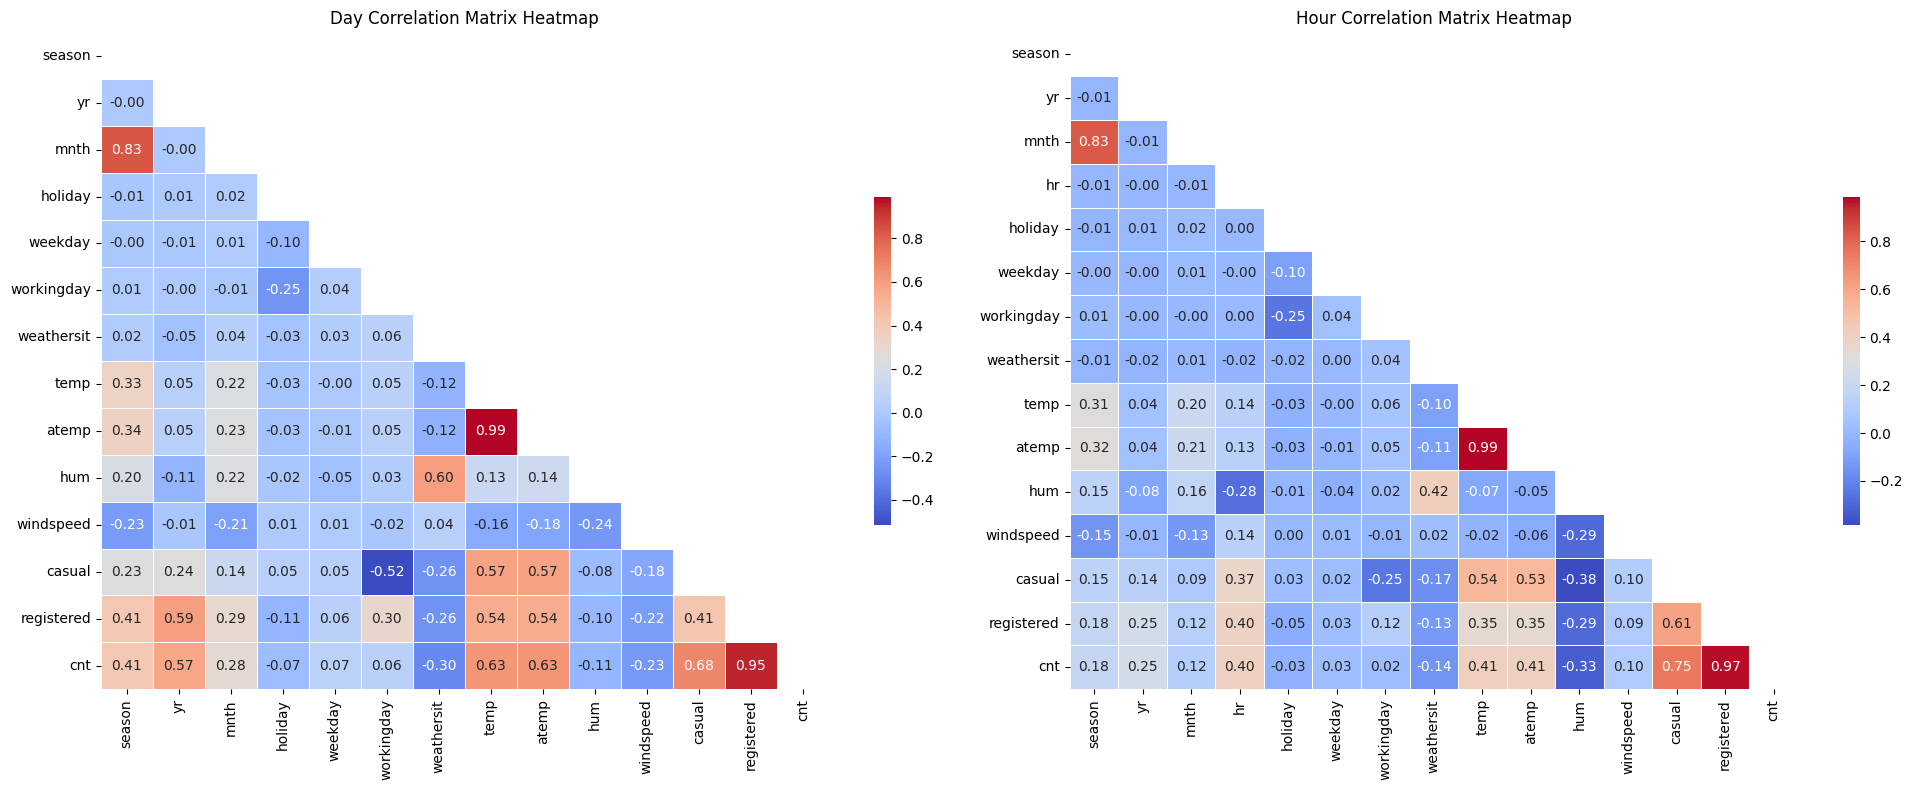

In [359]:
corr_day = day[day.drop(columns=['instant']).select_dtypes(include=['number']).columns].corr()
corr_hour = hour[hour.drop(columns=['instant']).select_dtypes(include=['number']).columns].corr()

mask_day = np.triu(np.ones_like(corr_day, dtype=bool))
mask_hour = np.triu(np.ones_like(corr_hour, dtype=bool))
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(corr_day, mask=mask_day, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
ax[0].set_title('Day Correlation Matrix Heatmap')

sns.heatmap(corr_hour, mask=mask_hour, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
ax[1].set_title('Hour Correlation Matrix Heatmap')

plt.tight_layout()
plt.show()

Although we should use the appropriate correlation method for categorical variables, the materials did not cover this aspect. Therefore, we will assume that all data can be analyzed using the default correlation method `corr()`.

We observe that temperature, season, year, and hour play roles in affecting bike usage, as indicated by the correlation with the 'cnt' column.

### Explore Monthly Bike Usage Distribution and Clustering

In this exploration, we will group the data by month and then examine the total bike usage from the 'cnt' column.

In [360]:
monthly_rentals = day.groupby(by = 'mnth').agg({
  'cnt': 'sum',
}).reset_index()

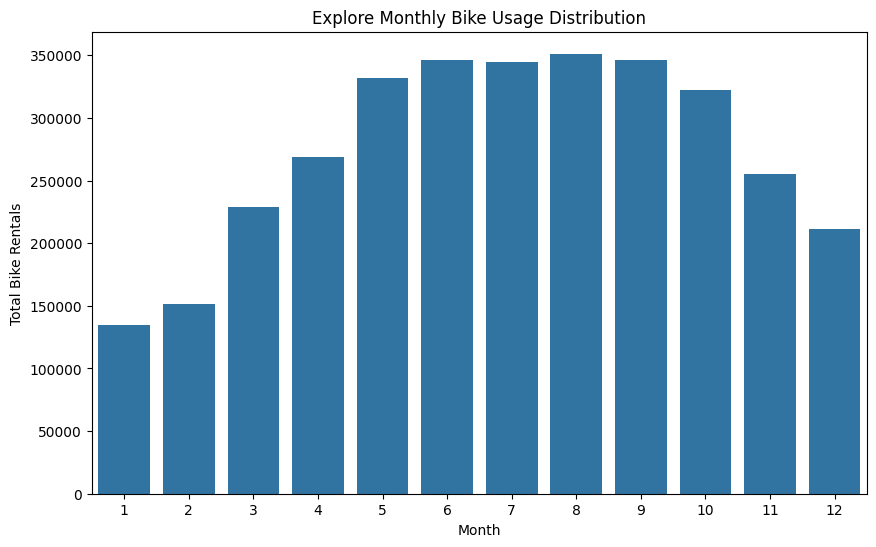

In [361]:
plt.figure(figsize=(10, 6))

sns.barplot(x='mnth', y='cnt', data=monthly_rentals)
plt.title('Explore Monthly Bike Usage Distribution')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.show()

This data is already informative, but it still appears somewhat monotonous. We can delve deeper by categorizing or clustering it based on threshold values. I will classify bike usage exceeding 300,000 in a month as 'High', over 200,000 as 'Medium', and anything below as 'Low'.

In [362]:
def classify_usage(cnt):
    if cnt > 300000:
        return 'High'
    elif cnt > 200000:
        return 'Medium'
    else:
        return 'Low'

monthly_rentals['category'] = monthly_rentals['cnt'].apply(classify_usage)

monthly_rentals

,mnth,cnt,category
0,1,134933,Low
1,2,151352,Low
2,3,228920,Medium
3,4,269094,Medium
4,5,331686,High
5,6,346342,High
6,7,344948,High
7,8,351194,High
8,9,345991,High
9,10,322352,High


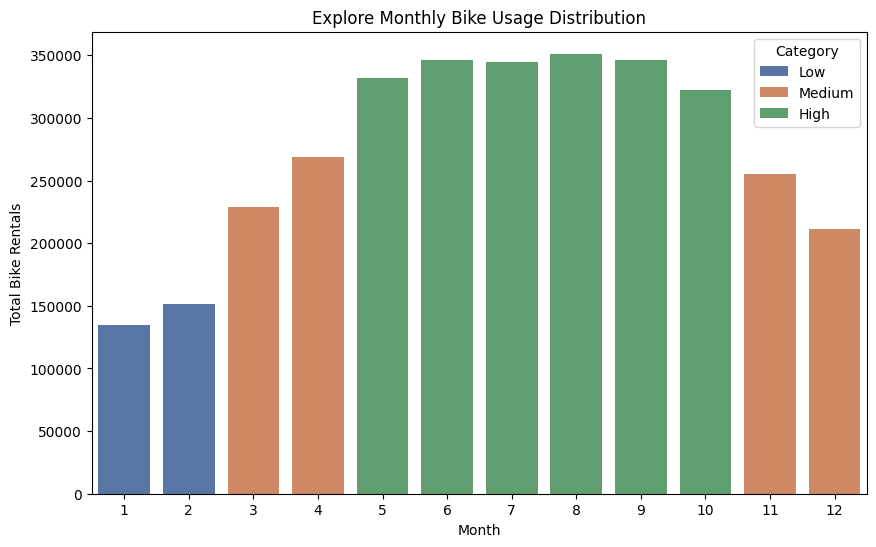

In [363]:
plt.figure(figsize=(10, 6))

sns.barplot(x='mnth', y='cnt', hue='category', data=monthly_rentals, palette='deep')
plt.title('Explore Monthly Bike Usage Distribution')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.legend(title='Category')

plt.show()

As you can now see, the data has become more insightful. We can observe that mid-year experiences the highest bike usage, while the period towards the end and before the mid-year shows medium usage, and the early part of the year has the lowest.

## Visualization & Explanatory Analysis

### Pertanyaan 1: How does daily bike usage change over time, and which season or month experiences the highest usage? Is there a correlation between bike usage and the number of holidays in that season or month?

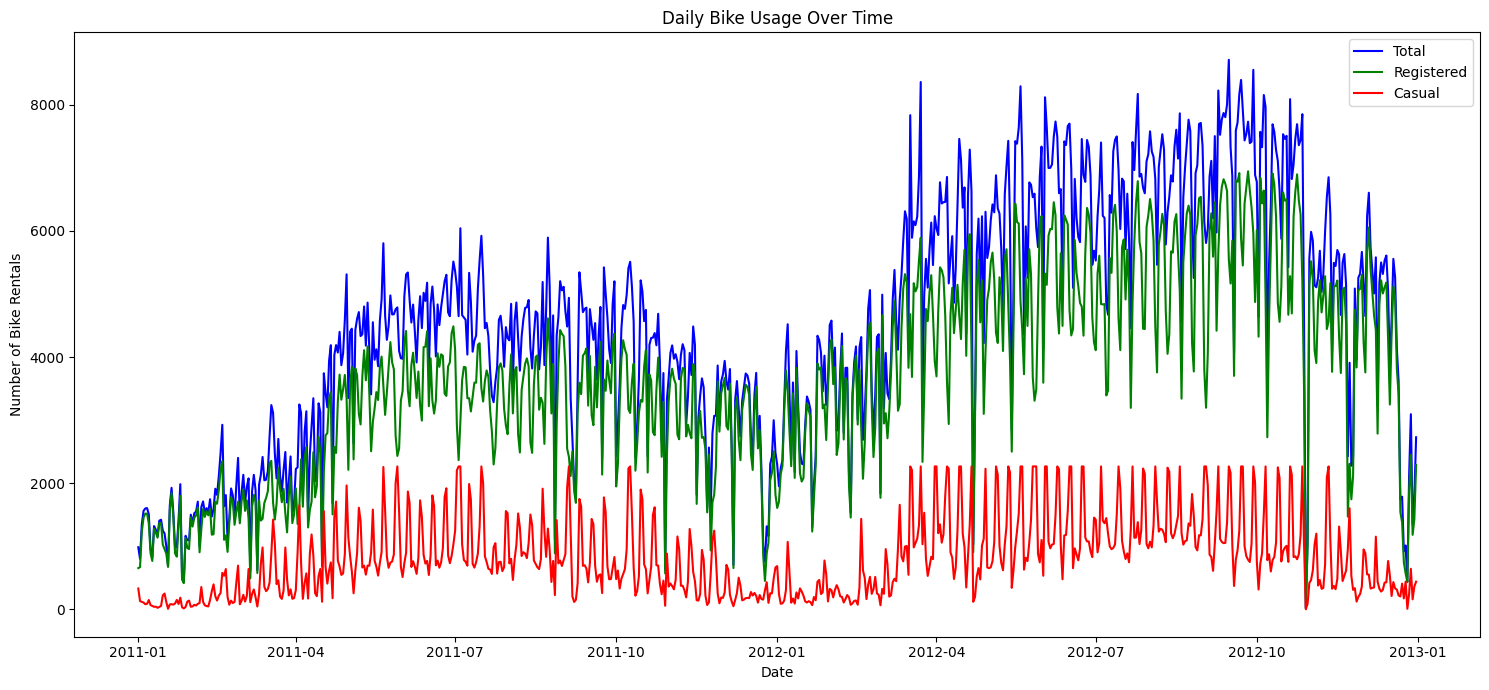

In [364]:
plt.figure(figsize=(15, 7))
plt.plot(day['dteday'], day['cnt'], label='Total', color='blue')
plt.plot(day['dteday'], day['registered'], label='Registered', color='green')
plt.plot(day['dteday'], day['casual'], label='Casual', color='red')

plt.title('Daily Bike Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bike Rentals')
plt.legend()
plt.tight_layout()
plt.show()

The daily line plot reveals that **bike usage peaked in the mid to late year**. This correlates with the earlier exploratory analysis, where mid-year exhibited the highest usage. There is no distinct difference between registered and casual users; they exhibit similar patterns, albeit with casual users showing lower counts.

In [365]:
monthly_rentals = day.groupby(by = 'mnth').agg({
  'cnt': 'sum',
  'holiday': 'sum'
}).reset_index()

monthly_rentals

,mnth,cnt,holiday
0,1,134933,3
1,2,151352,2
2,3,228920,0
3,4,269094,2
4,5,331686,2
5,6,346342,0
6,7,344948,2
7,8,351194,0
8,9,345991,2
9,10,322352,2


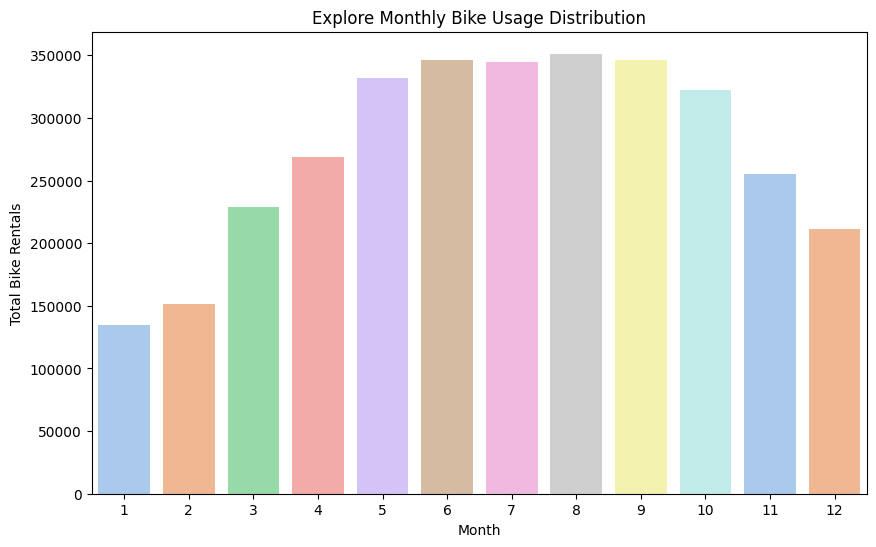

In [366]:
plt.figure(figsize=(10, 6))

sns.barplot(x='mnth', y='cnt', data=monthly_rentals, palette='pastel', hue = 'mnth', legend = False)
plt.title('Explore Monthly Bike Usage Distribution')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.show()

In [367]:
seasonly_rentals = day.groupby(by = 'season').agg({
  'cnt': 'sum',
  'holiday': 'sum'
}).reset_index()

seasonly_rentals

,season,cnt,holiday
0,1,471348,7
1,2,918589,4
2,3,1061129,4
3,4,841613,6


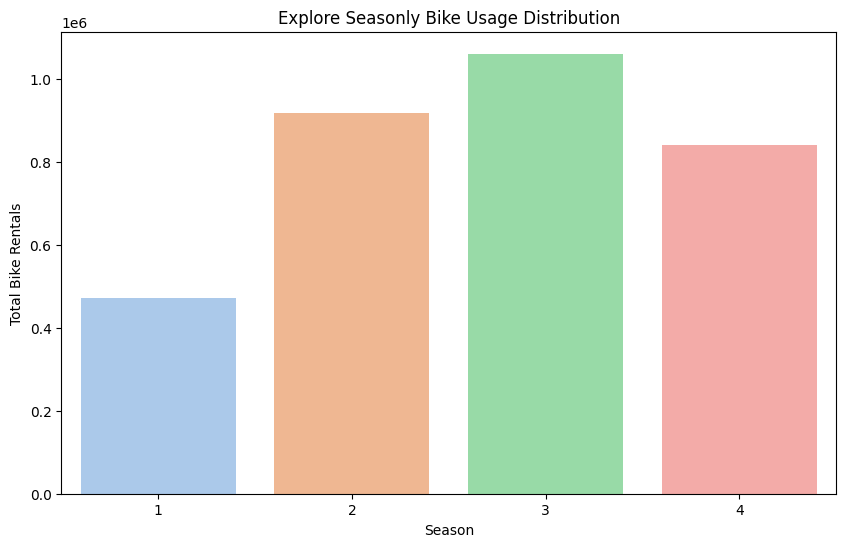

In [368]:
plt.figure(figsize=(10, 6))

sns.barplot(x='season', y='cnt', data=seasonly_rentals, palette='pastel', hue='season', legend=False)


plt.title('Explore Seasonly Bike Usage Distribution')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.show()

The visualization illustrates that bike usage peaked in **August** and during the **fall** season when the number of holidays is lower. This suggests that **number holidays do not significantly affect bike usage**, a conclusion supported by previous correlation analysis, which indicated almost no correlation between holidays and bike count

### Pertanyaan 2: What are the mean values of temperature (temp), feels-like temperature (atemp), humidity (hum), and wind speed in each season or month? How do these factors correlate with the number of daily bike rentals?

Since the data is slightly skewed, we will use the median as the measure of central tendency.

In [369]:
monthly = day.groupby(by = 'mnth').agg({
  'temp': 'median',
  'atemp': 'median',
  'hum': 'median',
  'windspeed': 'median',
  'cnt': 'sum'
}).reset_index()

monthly

,mnth,temp,atemp,hum,windspeed,cnt
0,1,0.217500,0.232771,0.537663,0.189987,134933
1,2,0.285833,0.291671,0.537917,0.195683,151352
2,3,0.380344,0.377200,0.580208,0.220463,228920
3,4,0.459584,0.453265,0.569584,0.233836,269094
4,5,0.595833,0.566288,0.707292,0.174448,331686
5,6,0.690416,0.639219,0.577916,0.171956,346342
6,7,0.748750,0.697291,0.595625,0.164806,344948
7,8,0.707696,0.654039,0.639166,0.166664,351194
8,9,0.621250,0.574518,0.710834,0.151742,345991
9,10,0.490834,0.481683,0.702500,0.166662,322352


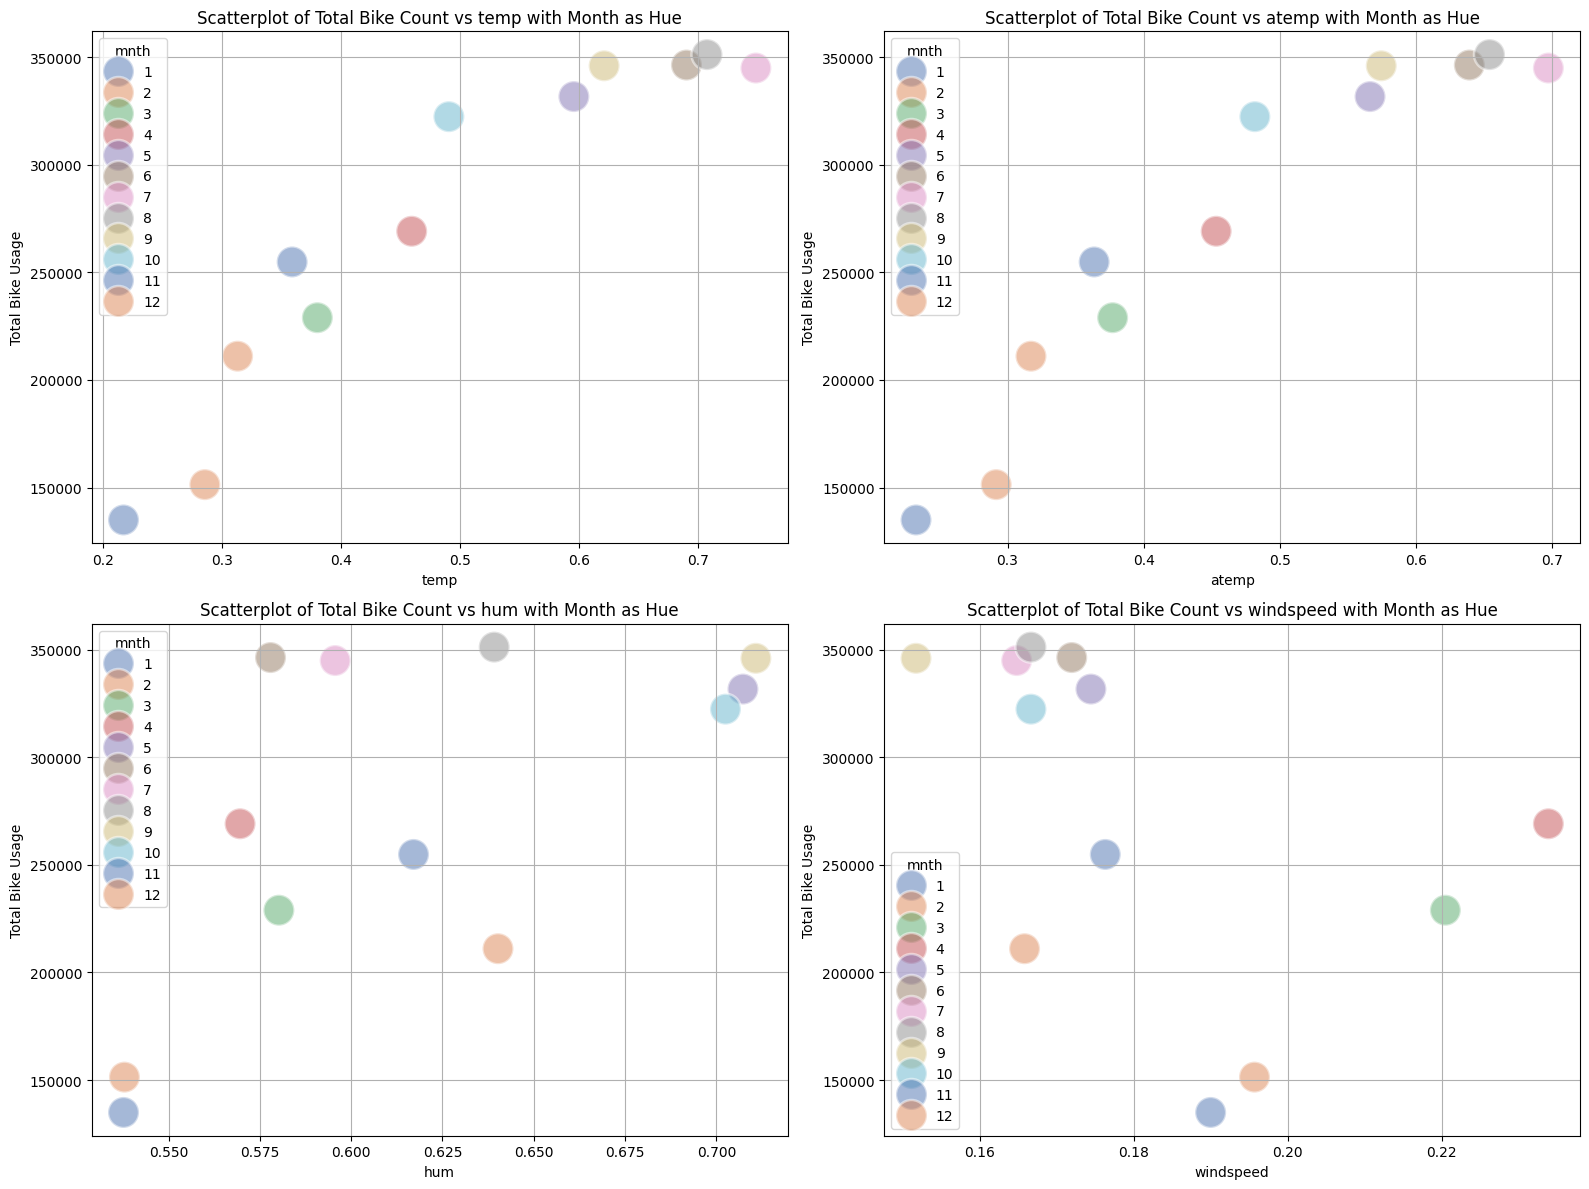

In [370]:
columns_to_plot = monthly.drop(columns='mnth').columns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    if column != 'cnt':
        sns.scatterplot(x=column, y='cnt', hue='mnth', data=monthly, alpha=0.5, s=500, palette='deep', ax=axes[i])
        axes[i].set_title(f'Scatterplot of Total Bike Count vs {column} with Month as Hue')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Total Bike Usage')
        axes[i].grid(True)

plt.tight_layout()
plt.show()

In [371]:
seasonly = day.groupby(by = 'season').agg({
  'temp': 'median',
  'atemp': 'median',
  'hum': 'median',
  'windspeed': 'median',
  'cnt': 'sum'
}).reset_index()

seasonly

,season,temp,atemp,hum,windspeed,cnt
0,1,0.285833,0.282821,0.544167,0.202750,471348
1,2,0.562083,0.538212,0.644375,0.194031,918589
2,3,0.714583,0.656575,0.635000,0.165115,1061129
3,4,0.409166,0.409394,0.661042,0.166986,841613


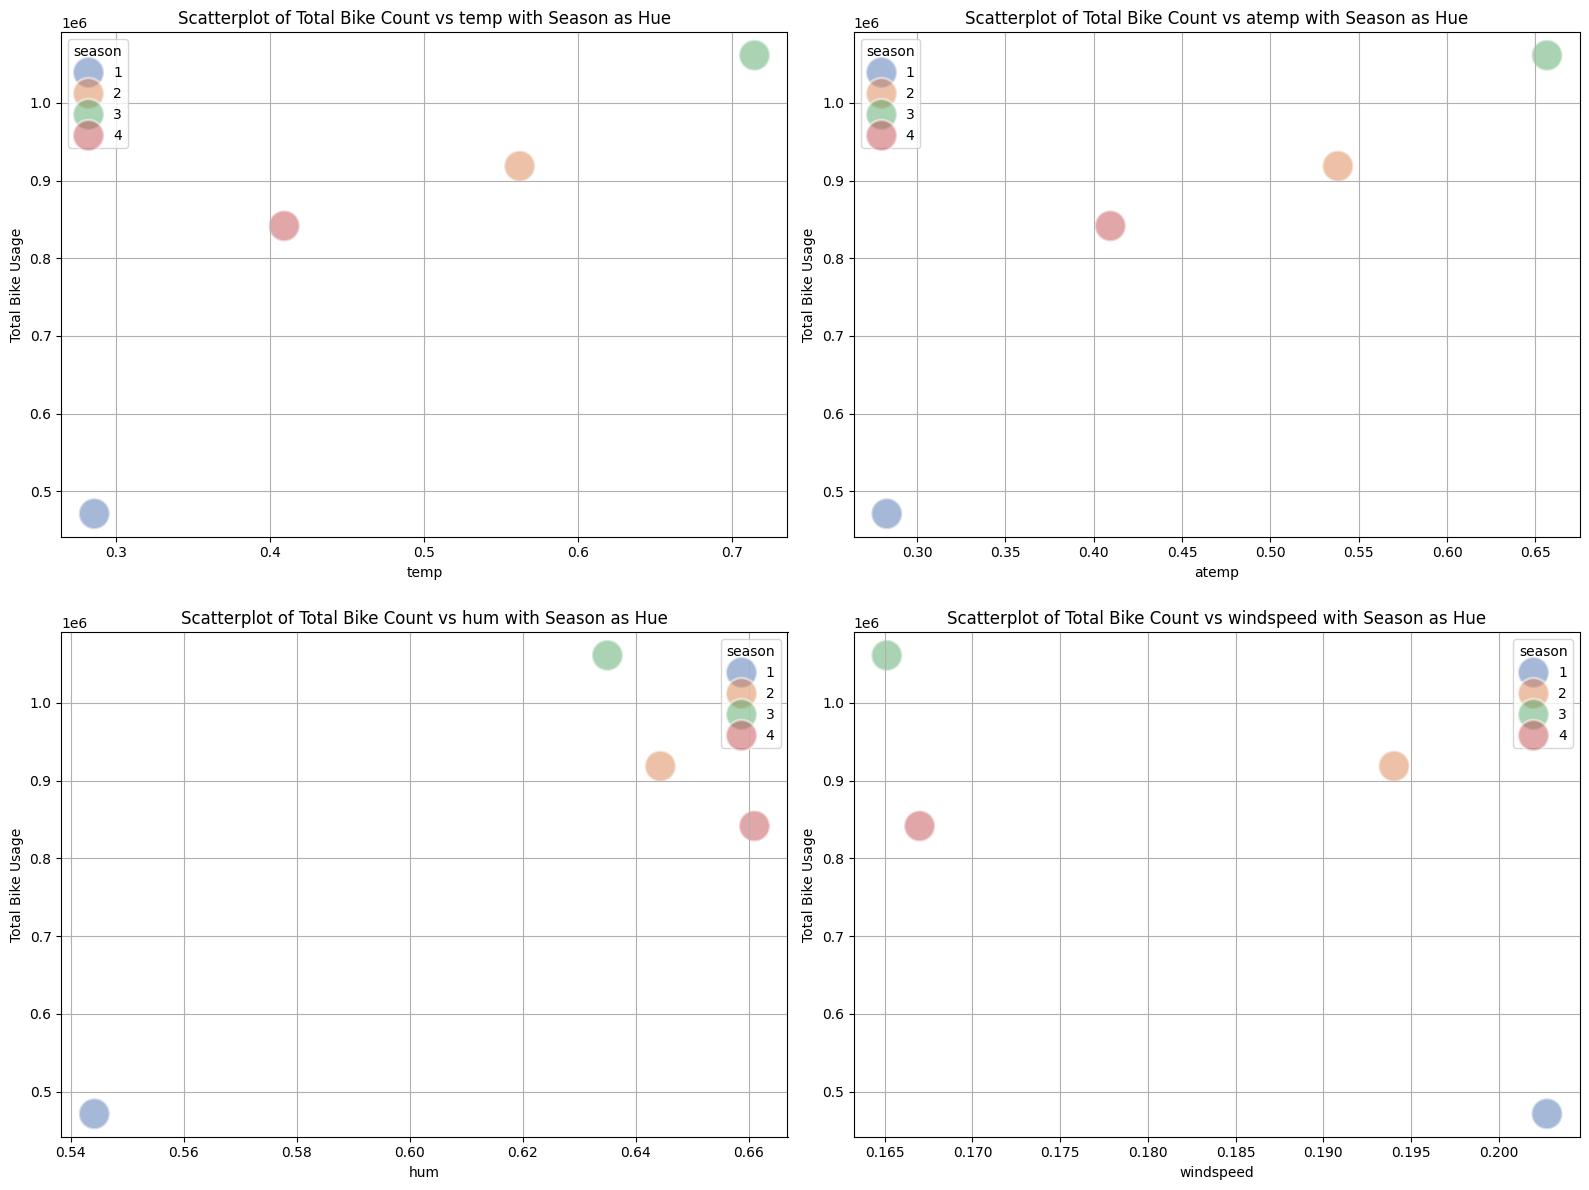

In [372]:
columns_to_plot = seasonly.drop(columns='season').columns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    if column != 'cnt':
        sns.scatterplot(x=column, y='cnt', hue='season', data=seasonly, alpha=0.5, s=500, palette='deep', ax=axes[i])
        axes[i].set_title(f'Scatterplot of Total Bike Count vs {column} with Season as Hue')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Total Bike Usage')
        axes[i].grid(True)

plt.tight_layout()
plt.show()

The plot shows that there is a **moderate correlation between temp, atemp, and cnt**, and a **weak negative correlation between windspeed and cnt**. Humidity, on the other hand, almost doesn't correlate with cnt. This is supported by the exploratory data analysis with the correlation values.

## Conclusion

- The analysis reveals that bike usage reached its peak during the mid to late year, notably in August and the fall season. Surprisingly, holidays did not significantly impact bike usage, as evidenced by the low correlation value, suggesting a lack of correlation between the number of holidays and the total bike count.

- Examining temperature patterns, both actual and perceived (as reflected in "atemp"), we observe a similar trend peaking during the mid to late year. Humidity levels also peaked during this period, while windspeed was highest in the early year. The analysis further indicates that higher temperatures coincide with increased bike usage, whereas lower windspeeds correlate with higher bike usage. Currently, there appears to be a moderate level of correlation, though further investigation is warranted to ascertain whether these factors exhibit multicollinearity.